In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

%matplotlib inline
%jsroot on

Welcome to JupyROOT 6.22/01


In [2]:
pion_data = pd.read_pickle("combined_data_pion_shuffled_02.pkl")
pion_data

KeyboardInterrupt: 

In [3]:
positron_data = pd.read_pickle("combined_data_positron_shuffled_02.pkl")
#positron_data

In [4]:
positron_data.drop(list(positron_data.loc[positron_data.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)
pion_data.drop(list(pion_data.loc[pion_data.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)

In [5]:
print(117450*.8)
124380*.8

93960.0


99504.0

In [6]:
positron_data.set_index(pd.Index([i for i in range(117410)]), inplace=True)
pion_data.set_index(pd.Index([i for i in range(124376)]), inplace=True)

In [7]:
xy_positron = positron_data.loc[:93960, ["rechit_energy_layer", "beamEnergy"]]
xy_positron_test = positron_data.loc[93960:, ["rechit_energy_layer", "beamEnergy"]]
xy_positron

,rechit_energy_layer,beamEnergy
0,"[5.48656964302063, 29.740489721298218, 51.1123...",20.0
1,"[15.071453332901001, 62.02698111534119, 140.12...",50.0
2,"[44.926788330078125, 86.39698994159698, 313.95...",200.0
3,"[73.69589388370514, 207.96170350909233, 443.36...",100.0
4,"[11.792863726615906, 49.1063517332077, 172.163...",200.0
...,...,...
93956,"[19.691016614437103, 90.15830579400063, 194.68...",100.0
93957,"[22.18404859304428, 111.93511259555817, 321.94...",200.0
93958,"[13.174220085144043, 45.518373638391495, 220.8...",20.0
93959,"[38.11557054519653, 130.2393012046814, 206.035...",20.0


In [8]:
xy_pion = pion_data.loc[:99504, ["rechit_energy_layer", "beamEnergy"]]
xy_pion_test = pion_data.loc[99504:, ["rechit_energy_layer", "beamEnergy", "trueBeamEnergy"]]
xy_pion

,rechit_energy_layer,beamEnergy
0,"[2.381936550140381, 2.4305286407470703, 9.5968...",50.0
1,"[1.1058409214019775, 1.1166751384735107, 1.151...",20.0
2,"[0.8060534000396729, 0.97751384973526, 5.12017...",200.0
3,"[1.4067063331604004, 0.9108871221542358, 1.299...",100.0
4,"[1.2860832214355469, 1.9425948858261108, 0.862...",20.0
...,...,...
99500,"[17.183522939682007, 2.746692419052124, 18.899...",200.0
99501,"[0.8494709730148315, 1.1578880548477173, 1.079...",300.0
99502,"[45.24921703338623, 95.32253250479698, 173.910...",100.0
99503,"[2.768479824066162, 1.800944447517395, 2.15268...",50.0


In [9]:
#xy = pd.concat([xy_pion, xy_positron])
#xy = xy.sample(frac=1)
#xy = xy.to_pickle("xy_for_training.pkl")

In [2]:
xy = pd.read_pickle("xy_for_training.pkl")
xy

,rechit_energy_layer,beamEnergy
47975,"[26.015280961990356, 105.10461860895157, 331.8...",200.0
64873,"[20.7343929708004, 79.9431083202362, 241.31541...",100.0
59173,"[0.9976387023925781, 1.4756653308868408, 1.601...",100.0
4308,"[1.2935569286346436, 1.03193998336792, 1.30641...",50.0
42888,"[2.626031517982483, 1.0127694606781006, 1.0932...",200.0
...,...,...
53320,"[47.354044914245605, 71.91613167524338, 93.527...",20.0
46624,"[1.5437191724777222, 0.6717944741249084, 0.894...",200.0
31454,"[60.00403296947479, 292.99281583726406, 741.41...",300.0
604,"[67.27446377277374, 249.73796129226685, 516.06...",300.0


In [3]:
X = np.stack(xy.rechit_energy_layer.values)
X.shape

(193466, 40)

In [4]:
#X=preprocessing.StandardScaler().fit(X).transform(X)
#X

In [5]:
Y = xy.beamEnergy.values
Y

array([200., 100., 100., ..., 300., 300.,  50.], dtype=float32)

In [6]:
from tensorflow.python import keras
import neptune
from neptunecontrib.monitoring.keras import NeptuneMonitor
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [ ]:
"""params = {'epochs': 100,
          'batch_size': 256,
          'lr': 0.01,
          'beta_1': 0.9,
          'units_per_layer': 1024,
          'dropout': 0.01}"""

In [ ]:
batch_size = np.random.randint(128, 1024, 10)
lr = np.random.uniform(0.0005, 0.0015, 10)
units_per_layer = np.random.randint(512, 2048, 10)
dropout = np.random.uniform(0.005, 0.015, 10)


In [ ]:
train_loss=[]
val_loss=[]

for i in range(10):

    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 100,
              'batch_size': batch_size[i],
              'optimizer':"adam",
              'activation':"relu",
              'lr': lr[i],
              'units_per_layer': units_per_layer[i],
              'num_hidden_layers': 1,
              'dropout': dropout[i],
              'loss_fuc': "mse"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[40], activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu) 
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.2,
              callbacks=[NeptuneMonitor()])
    
    l = history.history['loss']
    vl = history.history['val_loss']
    train_loss.append(l)
    val_loss.append(vl)
    
    print(i+19)

In [15]:


    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 100,
              'batch_size': 539,
              'optimizer':"adam",
              'activation':"relu",
              'lr': 0.000565844,
              'units_per_layer': 512,
              'num_hidden_layers': 2,
              'dropout': 0.02,
              'loss_fuc': "mse",
              'val_splip':0.1}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[40], activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(params['units_per_layer'], activation=keras.activations.relu),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(1, activation=keras.activations.relu) 
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit(X, Y,
              epochs=params['epochs'],
              batch_size=params['batch_size'],
              validation_split=0.1,
              callbacks=[NeptuneMonitor()])

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-39
Epoch 1/100
324/324 [==============================] - 5s 16ms/step - loss: 1767.2133 - val_loss: 1161.6853
Epoch 2/100
324/324 [==============================] - 4s 11ms/step - loss: 1066.2134 - val_loss: 1030.2546
Epoch 3/100
324/324 [==============================] - 4s 11ms/step - loss: 995.3898 - val_loss: 1028.7323
Epoch 4/100
324/324 [==============================] - 4s 11ms/step - loss: 949.7856 - val_loss: 963.3552
Epoch 5/100
324/324 [==============================] - 3s 10ms/step - loss: 899.4626 - val_loss: 924.1010
Epoch 6/100
324/324 [==============================] - 3s 10ms/step - loss: 813.8395 - val_loss: 839.6678
Epoch 7/100
324/324 [==============================] - 3s 10ms/step - loss: 722.0333 - val_loss: 743.7885
Epoch 8/100
324/324 [==============================] - 4s 11ms/step - loss: 684.8600 - val_loss: 749.8575
Epoch 9/100
324/324 [==============================] - 4s 12ms/step - loss: 672.8560 - val_l

2020-12-05 00:08:43.868394: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-05 00:08:44.372721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-05 00:08:44.374660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2020-12-05 00:08:44.377479: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nitish/Root/lib:/home/nitish/Root/lib/:
2020-12-05 00:08:44.379339: W tensorflow/stream_executor/platfor

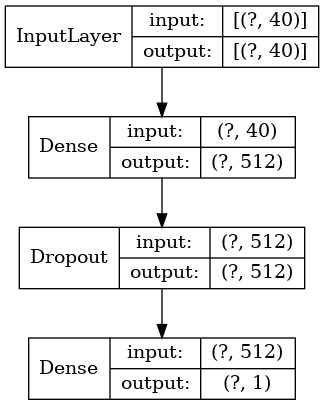

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(512, input_dim=40, activation=keras.activations.relu),
    keras.layers.Dropout(0.009),
    keras.layers.Dense(1, activation=keras.activations.relu) 
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.00056)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanSquaredError())

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [28]:
import pydot

In [ ]:
"""history=model.fit(X, Y,
          epochs=params['epochs'],
          batch_size=params['batch_size'],
          validation_split=0.2,
          callbacks=[NeptuneMonitor()])"""

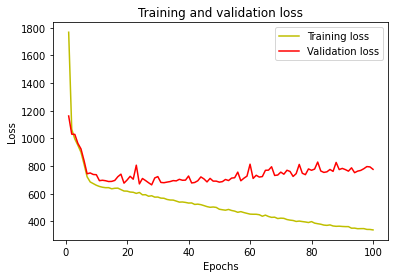

In [16]:
n=0
#l = train_loss[n]
#vl = val_loss[n]

l = history.history['loss']
vl = history.history['val_loss']

epochs = range(1, len(l) + 1)
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               20992     
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 21,505
Trainable params: 21,505
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_pion_test = np.stack(xy_pion_test.rechit_energy_layer.values)
x_positron_test = np.stack(xy_positron_test.rechit_energy_layer.values)

In [19]:
xy_pion_test["pred_energy"] = model.predict(x_pion_test)
xy_pion_test

,rechit_energy_layer,beamEnergy,trueBeamEnergy,pred_energy
99504,"[2.8410134315490723, 1.33797287940979, 1.43170...",20.0,19.889193,15.970251
99505,"[0.6647481322288513, 2.8174188137054443, 2.225...",300.0,302.439880,267.620239
99506,"[1.3266353607177734, 1.0852224826812744, 0.949...",50.0,50.156723,47.028805
99507,"[1.2607249021530151, 0.9402479529380798, 1.845...",100.0,99.060066,87.635277
99508,"[0.7270526885986328, 2.224700450897217, 2.4738...",100.0,100.693108,98.094978
...,...,...,...,...
124371,"[1.3581607341766357, 0.8177338242530823, 0.625...",300.0,298.845581,269.486389
124372,"[0.890269935131073, 3.9279664158821106, 4.9102...",100.0,100.154640,98.843025
124373,"[1.2927695512771606, 1.2073720693588257, 1.366...",50.0,49.806194,143.750076
124374,"[1.2978936433792114, 1.3454351425170898, 1.276...",20.0,20.142143,27.611027


In [20]:
xy_positron_test["pred_energy"] = model.predict(x_positron_test)
xy_positron_test

,rechit_energy_layer,beamEnergy,pred_energy
93960,"[48.474596083164215, 210.22055506706238, 526.9...",100.0,93.469635
93961,"[80.1898500919342, 290.61194786429405, 709.226...",200.0,193.800461
93962,"[26.53403690457344, 39.63148808479309, 205.012...",100.0,97.200691
93963,"[4.945270538330078, 58.32416772842407, 121.142...",50.0,48.689472
93964,"[17.606875479221344, 106.81302815675735, 338.8...",300.0,300.350433
...,...,...,...
117405,"[5.714633464813232, 38.73452568054199, 36.3505...",20.0,20.143728
117406,"[13.62235713005066, 52.56782001256943, 149.397...",50.0,51.010616
117407,"[28.073861598968506, 104.68717896938324, 116.3...",20.0,20.453190
117408,"[36.890026211738586, 73.41665822267532, 192.20...",300.0,293.164124


In [21]:
energy=[20, 50, 100, 200, 300]
pred_energy_pion = []
pred_energy_positron = []

for i in energy:
    pred_energy_pion.append(xy_pion_test.loc[xy_pion_test.beamEnergy==i].pred_energy.values)
    pred_energy_positron.append(xy_positron_test.loc[xy_positron_test.beamEnergy==i].pred_energy.values)
    
print(pred_energy_pion)
pred_energy_positron

[array([15.970251, 19.69729 , 16.797617, ..., 24.195223, 20.80136 ,
       27.611027], dtype=float32), array([ 47.028805,  37.58433 ,  49.8269  , ...,  58.595524,  53.904625,
       143.75008 ], dtype=float32), array([ 87.63528 ,  98.09498 ,  86.03196 , ..., 101.242485,  98.843025,
        83.77062 ], dtype=float32), array([259.15573, 189.50015, 233.48576, ..., 188.99551, 184.2618 ,
       161.09981], dtype=float32), array([267.62024, 366.88055, 323.74524, ..., 310.6869 , 261.0243 ,
       269.4864 ], dtype=float32)]


[array([19.762632, 20.82068 , 20.759771, ..., 21.430183, 20.143728,
        20.45319 ], dtype=float32),
 array([48.689472, 49.07783 , 48.415653, ..., 47.014973, 48.663525,
        51.010616], dtype=float32),
 array([ 93.469635,  97.20069 ,  98.27588 , ..., 102.03468 , 102.48881 ,
         95.97033 ], dtype=float32),
 array([193.80046, 201.55334, 202.76736, ..., 194.47426, 199.89622,
        202.41231], dtype=float32),
 array([300.35043, 284.34836, 287.56482, ..., 291.03317, 292.58978,
        293.16412], dtype=float32)]

In [28]:
%jsroot on
c = ROOT.TCanvas()

H_pion_pred_20 = ROOT.TH1F("H_pion_pred_20","Reconstructed Energy Distribution (pion);Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_50 = ROOT.TH1F("H_pion_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_100 = ROOT.TH1F("H_pion_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_200 = ROOT.TH1F("H_pion_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_300 = ROOT.TH1F("H_pion_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_pion[0].size):
    H_pion_pred_20.Fill(pred_energy_pion[0][i])
    
for i in range(pred_energy_pion[1].size):
    H_pion_pred_50.Fill(pred_energy_pion[1][i])
    
for i in range(pred_energy_pion[2].size):
    H_pion_pred_100.Fill(pred_energy_pion[2][i])
    
for i in range(pred_energy_pion[3].size):
    H_pion_pred_200.Fill(pred_energy_pion[3][i])
    
for i in range(pred_energy_pion[4].size):
    H_pion_pred_300.Fill(pred_energy_pion[4][i])
    


H_pion_pred_20.SetLineColor(1)
H_pion_pred_50.SetLineColor(2)
H_pion_pred_100.SetLineColor(3)
H_pion_pred_200.SetLineColor(4)
H_pion_pred_300.SetLineColor(5)




H_pion_pred_20.Draw()
H_pion_pred_50.Draw('same')
H_pion_pred_100.Draw('same')
H_pion_pred_200.Draw('same')
H_pion_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_50 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_300 (Potential memory leak).


In [31]:
H_positron_pred_20 = ROOT.TH1F("H_positron_pred_20","Reconstructed Energy Distribution (Positron);Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_50 = ROOT.TH1F("H_positron_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_100 = ROOT.TH1F("H_positron_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_200 = ROOT.TH1F("H_positron_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_positron_pred_300 = ROOT.TH1F("H_positron_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_positron[0].size):
    H_positron_pred_20.Fill(pred_energy_positron[0][i])
    
for i in range(pred_energy_positron[1].size):
    H_positron_pred_50.Fill(pred_energy_positron[1][i])
    
for i in range(pred_energy_positron[2].size):
    H_positron_pred_100.Fill(pred_energy_positron[2][i])
    
for i in range(pred_energy_positron[3].size):
    H_positron_pred_200.Fill(pred_energy_positron[3][i])
    
for i in range(pred_energy_positron[4].size):
    H_positron_pred_300.Fill(pred_energy_positron[4][i])
    


H_positron_pred_20.SetLineColor(1)
H_positron_pred_50.SetLineColor(2)
H_positron_pred_100.SetLineColor(3)
H_positron_pred_200.SetLineColor(4)
H_positron_pred_300.SetLineColor(5)




H_positron_pred_20.Draw()
H_positron_pred_50.Draw('same')
H_positron_pred_100.Draw('same')
H_positron_pred_200.Draw('same')
H_positron_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_50 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_300 (Potential memory leak).


In [24]:
pion_means = []
pion_stds = []

pion_means.append(H_pion_pred_20.GetMean())
pion_means.append(H_pion_pred_50.GetMean())
pion_means.append(H_pion_pred_100.GetMean())
pion_means.append(H_pion_pred_200.GetMean())
pion_means.append(H_pion_pred_300.GetMean())

pion_stds.append(H_pion_pred_20.GetStdDev())
pion_stds.append(H_pion_pred_50.GetStdDev())
pion_stds.append(H_pion_pred_100.GetStdDev())
pion_stds.append(H_pion_pred_200.GetStdDev())
pion_stds.append(H_pion_pred_300.GetStdDev())

print(pion_means)
pion_stds

[26.708859643647283, 54.69218027067449, 102.48287311848159, 192.84289017923518, 278.75497598294504]


[21.168865006099203,
 21.251880082133443,
 25.695416186588922,
 41.72698001305679,
 58.50539692153566]

In [25]:
positron_means = []
positron_stds = []

positron_means.append(H_positron_pred_20.GetMean())
positron_means.append(H_positron_pred_50.GetMean())
positron_means.append(H_positron_pred_100.GetMean())
positron_means.append(H_positron_pred_200.GetMean())
positron_means.append(H_positron_pred_300.GetMean())

positron_stds.append(H_positron_pred_20.GetStdDev())
positron_stds.append(H_positron_pred_50.GetStdDev())
positron_stds.append(H_positron_pred_100.GetStdDev())
positron_stds.append(H_positron_pred_200.GetStdDev())
positron_stds.append(H_positron_pred_300.GetStdDev())

print(positron_means)
positron_stds

[20.505899180299842, 49.630283699027764, 100.00090335626419, 200.08073072534378, 292.6602452856595]


[1.7450590518589297,
 2.2600263426117486,
 3.0250932040168634,
 4.230871882172724,
 5.310850225870337]

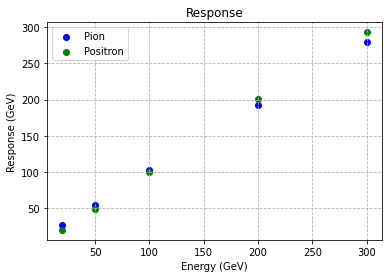

In [26]:
ene = [20, 50, 100, 200, 300]

plt.scatter(ene, pion_means, label="Pion", color="b")
plt.scatter(ene, positron_means, label="Positron", color="g")

plt.xlabel("Energy (GeV)")
plt.ylabel("Response (GeV)")
plt.title("Response")

plt.grid(linestyle='--')
plt.legend()
plt.show()

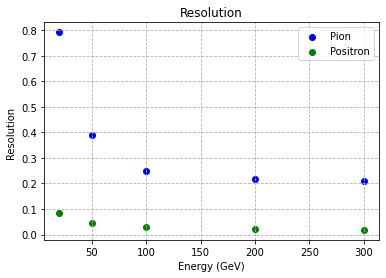

In [27]:
plt.scatter(ene, np.array(pion_stds)/np.array(pion_means), label="Pion", color="b")
plt.scatter(ene, np.array(positron_stds)/np.array(positron_means), label="Positron", color="g")

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution ")
plt.title("Resolution")

plt.grid(linestyle='--')
plt.legend()
plt.show()

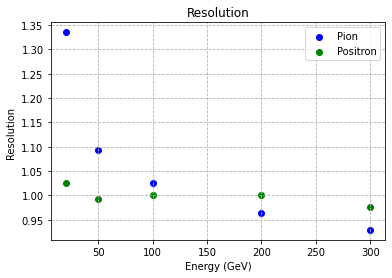

In [32]:
plt.scatter(ene, np.array(pion_means)/np.array(ene), label="Pion", color="b")
plt.scatter(ene, np.array(positron_means)/np.array(ene), label="Positron", color="g")

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution ")
plt.title("Resolution")

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [ ]:
%jsroot on
c = ROOT.TCanvas()

H_pion_pred_20 = ROOT.TH1F("H_pion_pred_20","Reconstructed Energy Distribution (pion);Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_50 = ROOT.TH1F("H_pion_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_100 = ROOT.TH1F("H_pion_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_200 = ROOT.TH1F("H_pion_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_300 = ROOT.TH1F("H_pion_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_pion[0].size):
    H_pion_pred_20.Fill(pred_energy_pion[0][i])
    
for i in range(pred_energy_pion[1].size):
    H_pion_pred_50.Fill(pred_energy_pion[1][i])
    
for i in range(pred_energy_pion[2].size):
    H_pion_pred_100.Fill(pred_energy_pion[2][i])
    
for i in range(pred_energy_pion[3].size):
    H_pion_pred_200.Fill(pred_energy_pion[3][i])
    
for i in range(pred_energy_pion[4].size):
    H_pion_pred_300.Fill(pred_energy_pion[4][i])
    


H_pion_pred_20.SetLineColor(1)
H_pion_pred_50.SetLineColor(2)
H_pion_pred_100.SetLineColor(3)
H_pion_pred_200.SetLineColor(4)
H_pion_pred_300.SetLineColor(5)




H_pion_pred_20.Draw()
H_pion_pred_50.Draw('same')
H_pion_pred_100.Draw('same')
H_pion_pred_200.Draw('same')
H_pion_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()


pion_means = []
pion_stds = []

pion_means.append(H_pion_pred_20.GetMean())
pion_means.append(H_pion_pred_50.GetMean())
pion_means.append(H_pion_pred_100.GetMean())
pion_means.append(H_pion_pred_200.GetMean())
pion_means.append(H_pion_pred_300.GetMean())

pion_stds.append(H_pion_pred_20.GetStdDev())
pion_stds.append(H_pion_pred_50.GetStdDev())
pion_stds.append(H_pion_pred_100.GetStdDev())
pion_stds.append(H_pion_pred_200.GetStdDev())
pion_stds.append(H_pion_pred_300.GetStdDev())

print(pion_means)
pion_stds